<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter8/RegressionBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Algorithm 8.7.1
## Import modules

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(1)

## Original Program

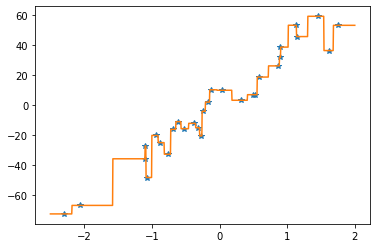

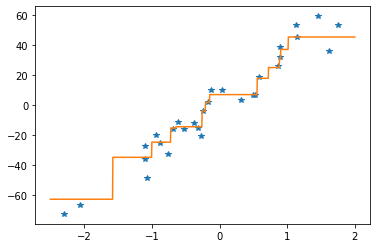

In [4]:
def TrainBoost(alpha,BoostingRounds,x,y):
    g_0 = np.mean(y)
    residuals  = y-alpha*g_0

    # list of basic regressor
    g_boost = []

    for i in range(BoostingRounds):
        h_i = DecisionTreeRegressor(max_depth=1)
        h_i.fit(x,residuals)
        residuals = residuals  - alpha*h_i.predict(x)
        g_boost.append(h_i)

    return g_0, g_boost

def Predict(g_0, g_boost,alpha, x):
    yhat = alpha*g_0*np.ones(len(x))
    for j in range(len(g_boost)):
        yhat = yhat+alpha*g_boost[j].predict(x)
    
    return yhat    


sz = 30

# create dataset    
x,y = make_regression(n_samples=sz, n_features=1, n_informative=1,noise=10.0)
  
# boosting algorithm
BoostingRounds = 1000
alphas = [1, 0.005]
    
for alpha in alphas:
    g_0, g_boost = TrainBoost(alpha,BoostingRounds,x,y)
    yhat = Predict(g_0, g_boost, alpha, x)
  
    # plot        
    tmpX =  np.reshape(np.linspace(-2.5,2,1000),(1000,1))
    yhatX = Predict(g_0, g_boost, alpha, tmpX)
    f = plt.figure()
    plt.plot(x,y,'*')
    plt.plot(tmpX,yhatX)
    plt.show()    